## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados


Pedro Cintra
- Obrigado pelas correções anteriores. Os pontos destacados foram corrigidos, espero que agora esteja de acordo com os requisitos.
    Nesse notebook contendo o projeto de formação em Data Science da Alura, exploramos dois datasets distintos, contendo informações de filmes, notas e diversas informações dispersas. O objetivo foi cruzar essas informações de forma relevante para que pudesse ser feita uma análise de como cada um desses dados interfere um no outro. Para isso, foram realizados:
    - Análise do conteúdo do dataset de filmes
    - Análise do conteúdo do dataset de notas
    - Junção de ambos, extraindo o maior número de informações relevantes possíveis
    - Visualização gráfica da distribuição das notas médias e total de votos
    - Exploração do dataset separando por gêneros

- A partir dessas explorações, pudemos fazer algumas análises como ver quais foram os gêneros mais votados e os filmes mais votados dentre esses gêneros.
  Já entrando no mundo da ciência de dados, pudemos simular tomada de decisões estretégicas baseadas nas visualizações de popularidade, quantidade de votos e notas médias, como por exemplo "Que gênero escolher para ser um sucesso de críticas?"
  Também algumas simulações de correlação para entender como cada medida conversa entre si. Com isso pudemos saber se o "ano de lançamento", por exemplo, interfere no número de votos, ou qualquer outra variável.
  Para a minha primeira visualização extra, eu quis explorar a possibilidade do aumento de filmes do tipo Animação com o passar dos anos, tendo como hipótese que com o passar dos anos e aumento consequente da tecnologia, mais filmes de animação surgiriam.
  Já na segunda, a intenção foi estudar o comportamento individual do usuário na hora de votar.
  
  Foi um exercício bem divertido de fazer e me ajudou a aprender muito. Obrigado Alura pela oportunidade
  

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet
!pip install statsmodels

Error processing line 1 of /Users/pedrocintra/opt/anaconda3/lib/python3.7/site-packages/matplotlib-3.1.3-py3.7-nspkg.pth:

  Traceback (most recent call last):
    File "/Users/pedrocintra/opt/anaconda3/lib/python3.7/site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 580, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Error processing line 1 of /Users/pedrocintra/opt/anaconda3/lib/python3.7/site-packages/matplotlib-3.1.3-py3.7-nspkg.pth:

  Traceback (most recent call last):
    File "/Users/pedrocintra/opt/anaconda3/lib/python3.7/site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 580, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Error processing line 1 of /Users/pedrocintra/opt/anaconda3/

In [3]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.nonparametric.api as smnp

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.0.3
Usando seaborn 0.10.0
Usando scipy 1.4.1


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [4]:
url_filmes = 'https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv'
filmes = pd.read_csv(url_filmes)

In [5]:
filmes.columns=['filmeId','titulo','generos']
filmes.set_index('filmeId', inplace = True)

In [6]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [7]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [8]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [9]:
url_notas = 'https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv'
notas = pd.read_csv(url_notas)
notas.columns=['usuarioId','filmeId','nota','momento']

In [10]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [11]:
filmes['nota_media'] = notas.groupby('filmeId').mean()['nota']

In [12]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [13]:
# solução para calcular o total de votos por filme
total_de_votos = notas.groupby('filmeId').count()

In [14]:
# solução para criar a nova coluna e filtrar os filmes
filmes = filmes.merge(total_de_votos,on='filmeId')
filmes.rename(columns={'nota':'total_de_votos'}, inplace=True)


In [15]:
filmes.drop(columns=['usuarioId','momento'],axis=1,inplace=True)
filmes = filmes[filmes.total_de_votos >= 50]

In [16]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 1.0, 'Nota média dos filmes com 50 ou mais votos')

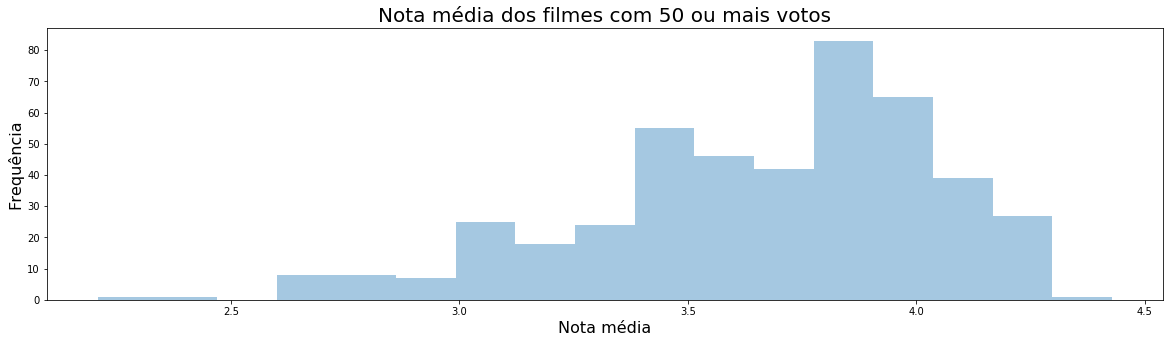

In [17]:
# solução histograma
plt.figure(figsize=(20,5))
ax = sns.distplot(filmes.nota_media, norm_hist= False, kde= False)
ax.set_xlabel('Nota média',fontsize=16);
ax.set_ylabel('Frequência',fontsize=16)
ax.set_title('Nota média dos filmes com 50 ou mais votos',fontsize=20)


Text(0.5, 1.0, 'Nota média cumulativa dos filmes com 50 ou mais votos')

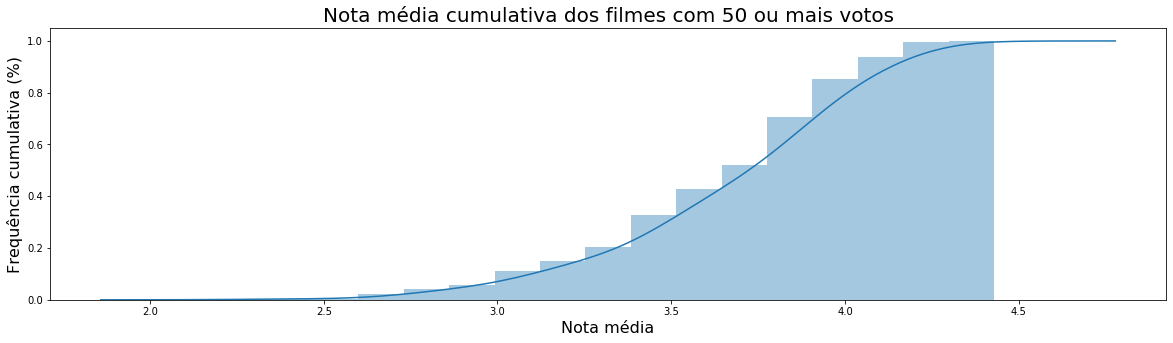

In [18]:
# solução cumulativa
plt.figure(figsize=(20,5))
kwargs = {'cumulative': True}
ax = sns.distplot(filmes.nota_media, hist_kws=kwargs, kde_kws=kwargs)
ax.set_xlabel('Nota média',fontsize=16);
ax.set_ylabel('Frequência cumulativa (%)',fontsize=16)
ax.set_title('Nota média cumulativa dos filmes com 50 ou mais votos',fontsize=20)

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 1.0, 'Total de votos dos filmes com 50 ou mais votos')

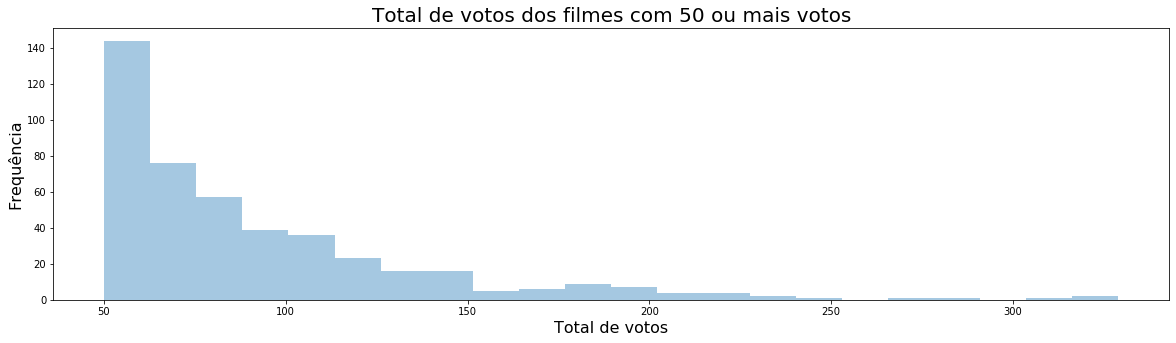

In [19]:
# solução histograma
plt.figure(figsize=(20,5))
ax = sns.distplot(filmes.total_de_votos,norm_hist= False, kde= False)
ax.set_xlabel('Total de votos',fontsize=16);
ax.set_ylabel('Frequência',fontsize=16)
ax.set_title('Total de votos dos filmes com 50 ou mais votos',fontsize=20)

Text(0.5, 1.0, 'Total de votos cumulativo dos filmes com 50 ou mais votos')

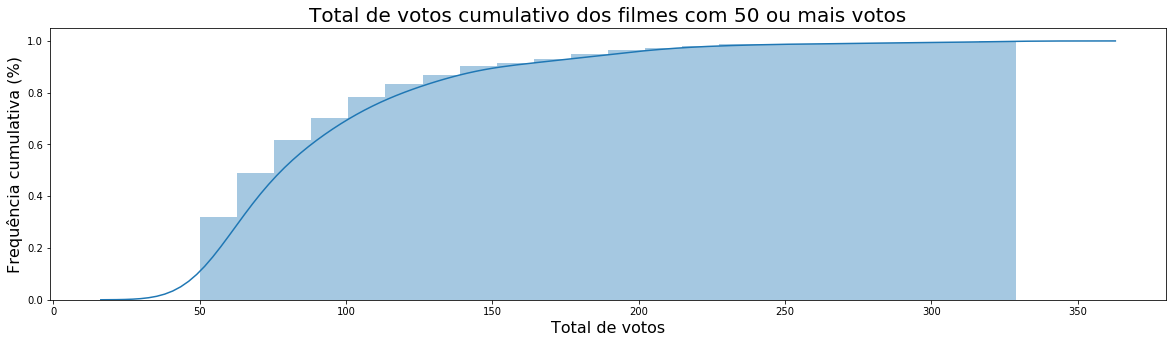

In [20]:
# solução cumulativa
plt.figure(figsize=(20,5))
ax = sns.distplot(filmes.total_de_votos, hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.set_xlabel('Total de votos',fontsize=16);
ax.set_ylabel('Frequência cumulativa (%)',fontsize=16)
ax.set_title('Total de votos cumulativo dos filmes com 50 ou mais votos',fontsize=20)

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [21]:
# solução
nota_limite_dos_20_porcento = filmes.nota_media.quantile(.20)

In [22]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.37


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [23]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [24]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

Text(0.5, 1.0, 'Quantidade de filmes por Gênero')

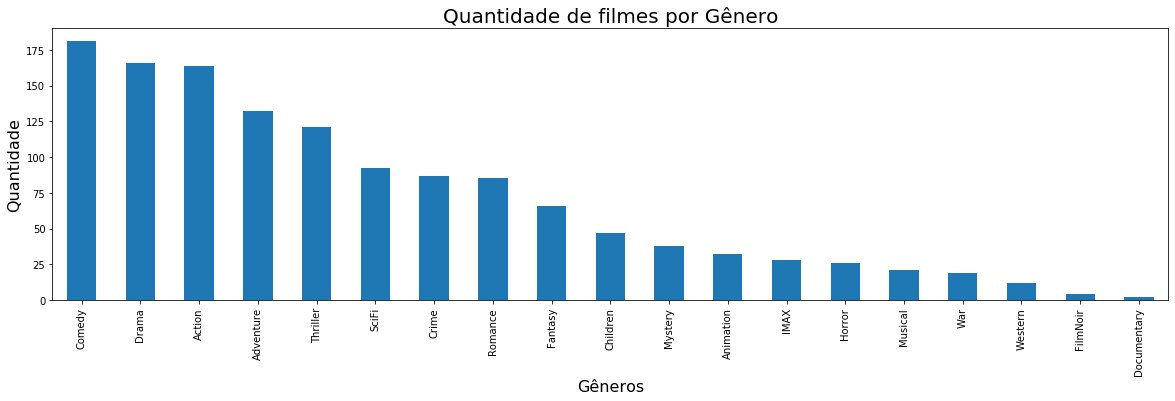

In [25]:
# solução
plt.figure(figsize=(20,5))
generos_por_quantidade = generos.sum().sort_values(ascending = False)
generos_por_quantidade.plot.bar()
plt.xlabel('Gêneros', fontsize=16)
plt.ylabel('Quantidade', fontsize=16)
plt.title('Quantidade de filmes por Gênero', fontsize=20)

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [26]:
# solução
top5_generos_em_quantidade_de_filmes = generos_por_quantidade[:5]

In [27]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [28]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0,215,215,215,215,0,0,0,215,0,0,0,0,0,0,0,0,0,0
1,0,110,0,110,0,0,0,0,110,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,52,0,0,0,0,0,0,0,0,0,52,0,0,0,0
3,102,0,0,0,0,102,0,0,0,0,0,0,0,0,0,0,102,0,0
4,0,0,0,0,54,0,0,0,0,0,0,0,0,0,54,0,0,0,0


In [29]:
# solucão
votos_por_genero_por_filme = votos_por_genero_por_filme.sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Quantidade de votos por Gênero')

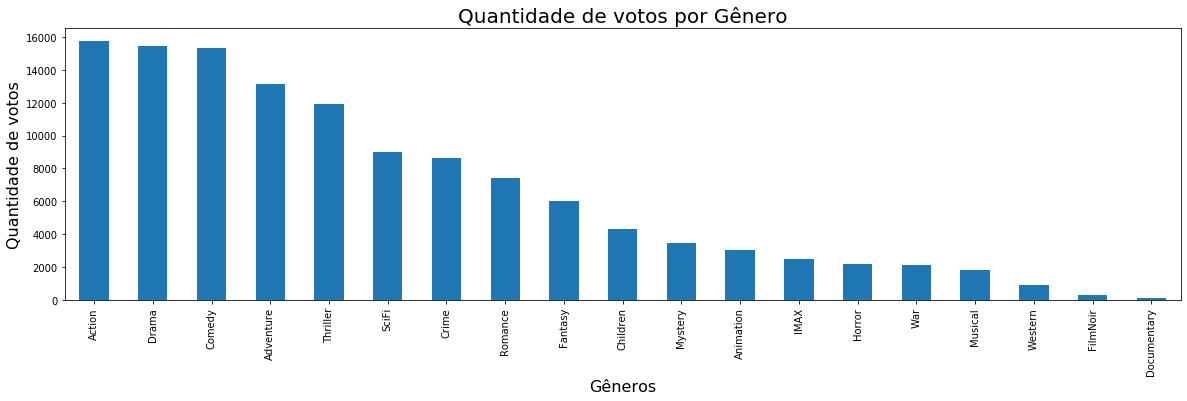

In [30]:
# solução
plt.figure(figsize=(20,5))
votos_por_genero_por_filme.plot.bar()
plt.xlabel('Gêneros', fontsize = 16)
plt.ylabel('Quantidade de votos', fontsize = 16)
plt.title('Quantidade de votos por Gênero', fontsize = 20)


## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [31]:
# solucao código
votos_por_filme_por_genero = (votos_por_genero_por_filme.sort_index())/(generos_por_quantidade.sort_index())
votos_por_filme_por_genero = votos_por_filme_por_genero.sort_values(ascending=False)

Text(0.5, 1.0, 'Popularidade dos Filmes por Gênero')

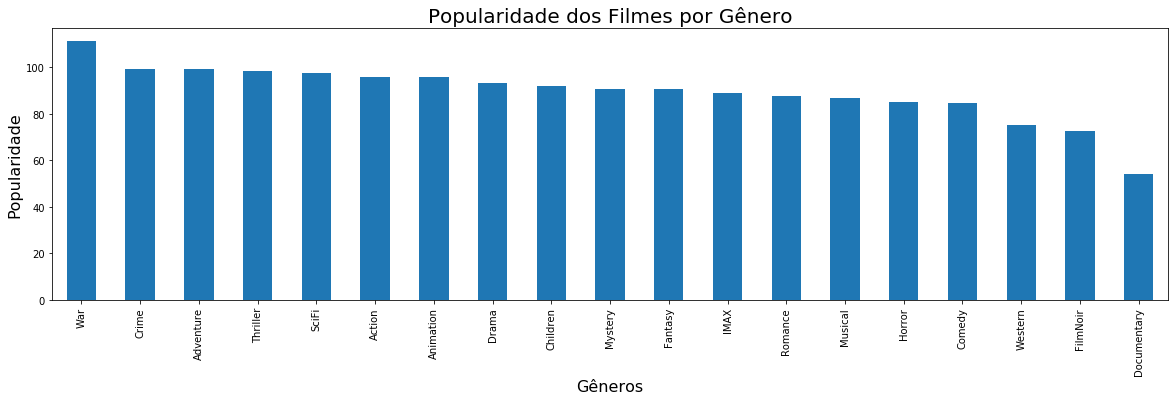

In [32]:
# solução com visualização 
plt.figure(figsize=(20,5))
votos_por_filme_por_genero.plot.bar()
plt.xlabel('Gêneros', fontsize = 16)
plt.ylabel('Popularidade', fontsize = 16)
plt.title('Popularidade dos Filmes por Gênero', fontsize = 20)

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    Existem muito mais filmes do genero "Action", tão como a quantidade de votos para o mesmo. Porém, ao dividirmos a quantidade de votos pela quantidade de filmes do mesmo genero, podemos perceber que a popularidade dos filmes do genero "War" é relativamente maior

    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

In [33]:
votos_filmes_de_horror = filmes.query('Horror == 1')['total_de_votos']
votos_filmes_de_adventure = filmes.query('Adventure == 1')['total_de_votos']

Text(0, 0.5, 'Total de votos')

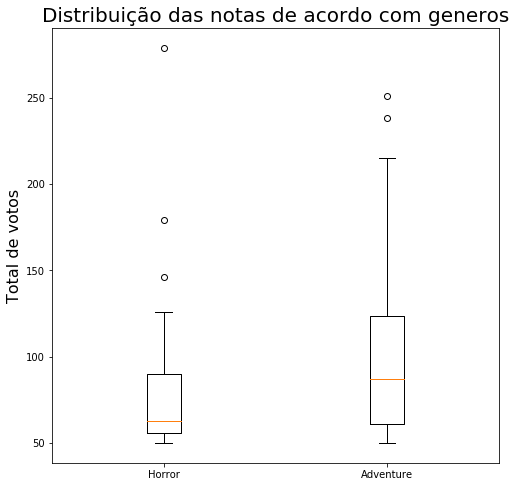

In [34]:
# total_de_votos_por_genero = generos.mul(filmes.total_de_votos, axis='index')
plt.figure(figsize=(8,8))
plt.boxplot(x= [votos_filmes_de_horror, votos_filmes_de_adventure], 
            labels = ['Horror','Adventure'])
plt.title("Distribuição das notas de acordo com generos", fontsize = 20)
plt.ylabel('Total de votos', fontsize = 16)

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

Text(0.5, 0, 'Gêneros')

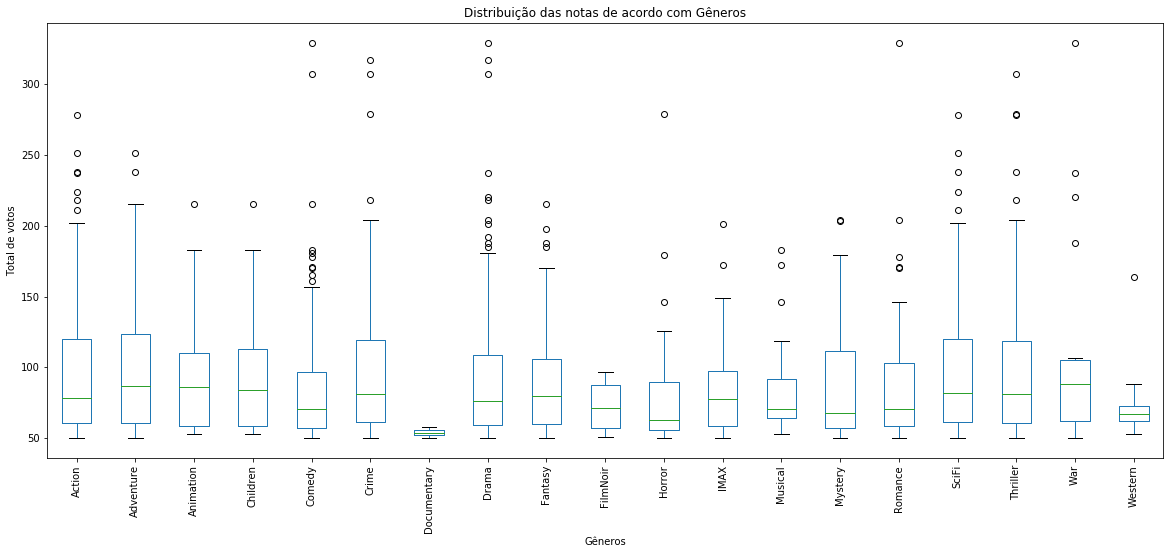

In [35]:
votos_todas_categorias = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_todas_categorias = votos_todas_categorias[votos_todas_categorias > 0]

votos_todas_categorias.plot(kind='box', figsize=(20,8))

plt.title("Distribuição das notas de acordo com Gêneros")
plt.xticks(rotation=90)
plt.ylabel('Total de votos')
plt.xlabel('Gêneros')

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
- Difícil analisar sem levar em conta o budget ou o revenue, porém, apenas com uma análise gráfica, percebemos que o genero Adventure, tendo mais filmes, recebe mais votos e tem mais popularidade (votos sobre a quantidade de filmes) do que o genero Horror


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

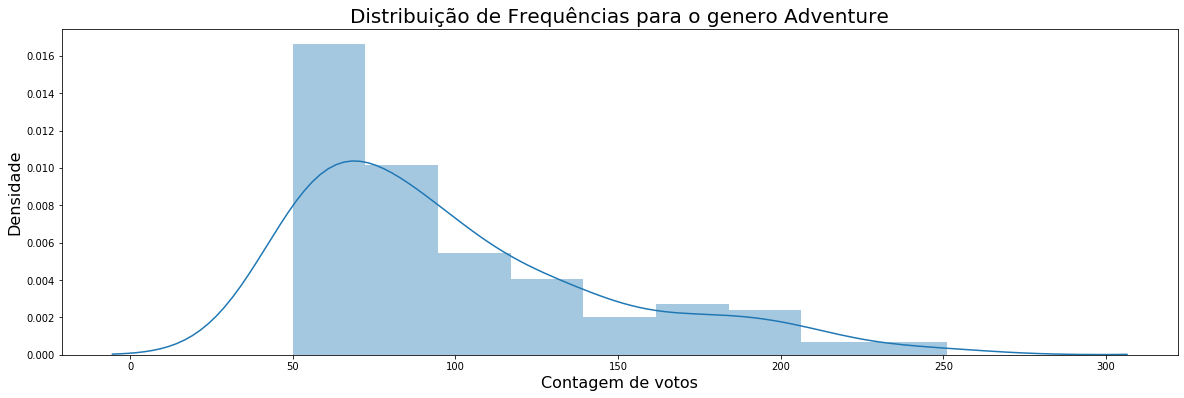

In [36]:
# solucao histograma de aventura

ax = sns.distplot(votos_todas_categorias.Adventure)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências para o genero Adventure', fontsize=20)
ax.set_xlabel('Contagem de votos', fontsize=16)
ax.set_ylabel('Densidade',fontsize=16)
ax

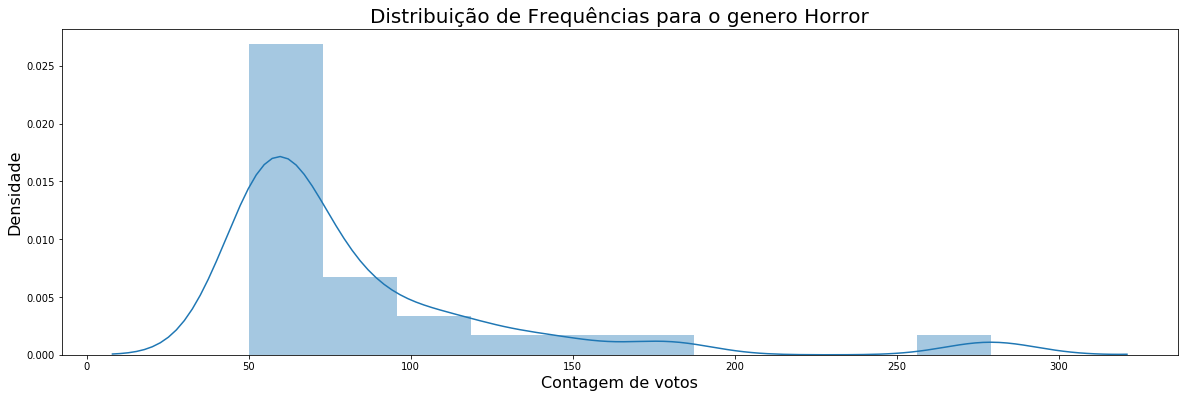

In [37]:
# solucao histograma de horror

ax = sns.distplot(votos_todas_categorias.Horror)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências para o genero Horror', fontsize=20)
ax.set_xlabel('Contagem de votos', fontsize=16)
ax.set_ylabel('Densidade',fontsize=16)
ax

In [38]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

pvalue_adventure = scipy.stats.normaltest(votos_filmes_de_adventure)
pvalue_horror = scipy.stats.normaltest(votos_filmes_de_horror)

print ('O resultado do pvalue para o genero Adventure foi de: ', pvalue_adventure[1].round(5))
print ('O resultado do pvalue para o genero Horror foi de: ', pvalue_horror[1].round(5))

O resultado do pvalue para o genero Adventure foi de:  1e-05
O resultado do pvalue para o genero Horror foi de:  0.0


Ao aplicar o teste de normalidade foi obtido um p-value menor que 0.05 para as duas distribuições, o que indica que as distribuições não são normais. Assim, para verificar se existe significância estatística, temos que utilizar um teste não paramétrico como o ranksums

In [39]:
from scipy.stats import ranksums

ranksums_amostra = scipy.stats.ranksums(votos_filmes_de_adventure, votos_filmes_de_horror)

print ('O resultado do ranksumns para a amostra foi de: ', ranksums_amostra)

O resultado do ranksumns para a amostra foi de:  RanksumsResult(statistic=1.9789320045004148, pvalue=0.04782366231999856)


### Solução (explique sua conclusão):
o pvalue considerado era de 0.05. Como nenhum dos testes de normalidade mostraram esse valor, foi aplicado o teste ranksums para comparar as amostras, à partir do pressuposto de que as distribuições são iguais.
No ranksums, o p-value foi de .0478, então descartaremos a hipótese nula.


## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

In [40]:
# solução:
nota_media_de_horror = filmes.query('Horror == 1')['nota_media']
nota_media_de_adventure = filmes.query('Adventure == 1')['nota_media']

Text(0, 0.5, 'Nota Média')

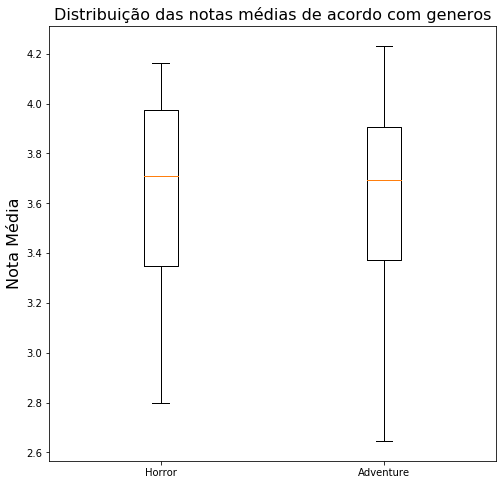

In [41]:
plt.figure(figsize=(8,8))
plt.boxplot(x= [nota_media_de_horror, nota_media_de_adventure], 
            labels = ['Horror','Adventure'])
plt.title("Distribuição das notas médias de acordo com generos", fontsize = 16)
plt.ylabel('Nota Média', fontsize = 16)

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:
Uma breve análise visual nos mostra que Horror tem uma maior média de notas

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

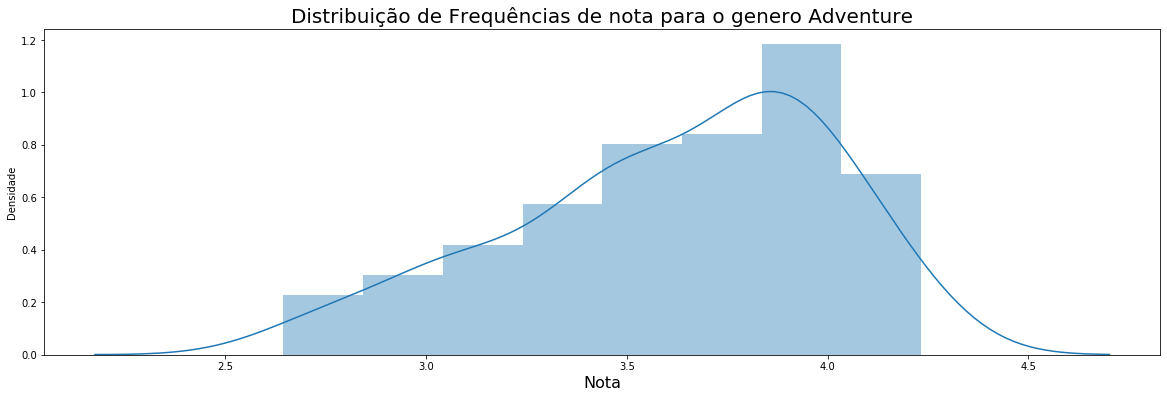

In [42]:
# solucao histograma de aventura

ax = sns.distplot(nota_media_de_adventure)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências de nota para o genero Adventure', fontsize=20)
ax.set_xlabel('Nota', fontsize=16)
ax.set_ylabel('Densidade')
ax

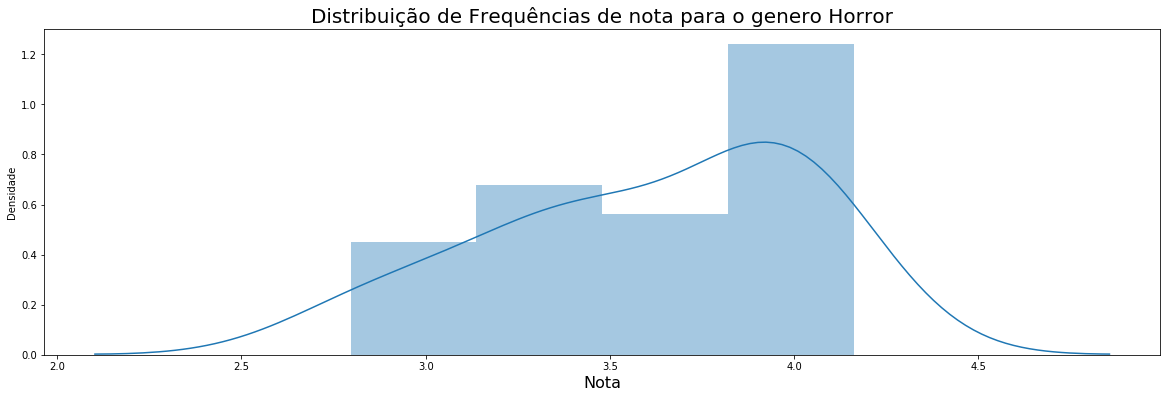

In [43]:
# solucao histograma de horror

ax = sns.distplot(nota_media_de_horror)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências de nota para o genero Horror', fontsize=20)
ax.set_xlabel('Nota', fontsize=16)
ax.set_ylabel('Densidade')
ax

In [44]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

pvalue_adventure = scipy.stats.normaltest(nota_media_de_adventure)
pvalue_horror = scipy.stats.normaltest(nota_media_de_horror)

print ('O resultado do pvalue para o genero Adventure foi de: ', pvalue_adventure[1].round(5))
print ('O resultado do pvalue para o genero Horror foi de: ', pvalue_horror[1].round(5))

O resultado do pvalue para o genero Adventure foi de:  0.01284
O resultado do pvalue para o genero Horror foi de:  0.21186


In [45]:
print (ranksums(nota_media_de_horror, nota_media_de_adventure))

RanksumsResult(statistic=0.2133682611487414, pvalue=0.8310397344212459)


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Diferente do exercício anterior, ao realizar os testes para a nota média dos dois generos, não podemos rejeitar a hipótese nula.
Ao analisar a distribuição, ambas são semelhantes quando se trata de frequência.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:

Conforme explicado anteriormente, levando em conta os fatores descritos, recomendaria o genero Adventure, onde costuma receber uma média maior. No segundo exercício, os testes estatísticos indicam que as quantidades de votos para aventura são maiores.


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [46]:
# solução: calculando os 2 generos mais votados
votos_por_genero = votos_todas_categorias.sum()
votos_por_genero

Action         15734.0
Adventure      13117.0
Animation       3066.0
Children        4331.0
Comedy         15330.0
Crime           8649.0
Documentary      108.0
Drama          15445.0
Fantasy         5993.0
FilmNoir         291.0
Horror          2215.0
IMAX            2492.0
Musical         1822.0
Mystery         3452.0
Romance         7444.0
SciFi           8989.0
Thriller       11907.0
War             2113.0
Western          900.0
dtype: float64

In [47]:
# solução: calculando os 2 generos mais votados
top_5_Action = filmes.query('Action == 1')['nota_media'].sort_values(ascending = False)[:5]
top_5_Adventure = filmes.query('Adventure == 1')['nota_media'].sort_values(ascending = False)[:5]
top_5_dos_mais_votados = top_5_Action.append(top_5_Adventure).sort_values(ascending = False).drop_duplicates()[:5]
top_5_dos_mais_votados

filmeId
2959     4.272936
58559    4.238255
1197     4.232394
260      4.231076
1208     4.219626
Name: nota_media, dtype: float64

In [48]:
# solução: encontrando os top 5 filmes desses generos
print('Os top 5 filmes dos 2 generos mais assistidos são:')
for i in top_5_dos_mais_votados.index:
    print(filmes.titulo[i])

Os top 5 filmes dos 2 generos mais assistidos são:
Fight Club (1999)
Dark Knight, The (2008)
Princess Bride, The (1987)
Star Wars: Episode IV - A New Hope (1977)
Apocalypse Now (1979)


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [49]:
# solucao
filmes.corr().nota_media.sort_values(ascending = True)

Comedy              -0.256005
ano_de_lancamento   -0.159146
Action              -0.154089
SciFi               -0.136717
Adventure           -0.079985
Romance             -0.072002
Western             -0.059642
Horror              -0.033877
Children            -0.030360
Fantasy             -0.020986
Thriller            -0.016782
Musical             -0.008529
Documentary         -0.003486
Animation            0.043071
IMAX                 0.064931
FilmNoir             0.081766
War                  0.125615
Mystery              0.129914
Crime                0.190220
Drama                0.277662
total_de_votos       0.342584
nota_media           1.000000
Name: nota_media, dtype: float64

### Resposta:
- Os Generos com maior correlação com a nota média são: Drama e Crime
- Os Generos com menor correlação com a nota média são: Documentary e Musical (mais próximos de 0),
- Os Generos Action e Comedy, são os com correlação negativa maior

## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [50]:
# solucao
filmes.corr().total_de_votos.sort_values(ascending = True)

Comedy              -0.128527
Western             -0.060789
Documentary         -0.055010
Romance             -0.045427
FilmNoir            -0.039408
Horror              -0.036132
ano_de_lancamento   -0.028709
Musical             -0.024741
IMAX                -0.016285
Fantasy             -0.009976
Mystery             -0.007051
Children             0.001764
Drama                0.018779
Animation            0.023442
SciFi                0.063802
Action               0.066239
Crime                0.079766
Thriller             0.085525
War                  0.087999
Adventure            0.104380
nota_media           0.342584
total_de_votos       1.000000
Name: total_de_votos, dtype: float64

### Resposta:
- Os Generos com maior correlação com total de votos são: Adventure e War
- Os Generos com menor correlação com total de votos são: Children e Mystery (mais próximos de 0),
- Os Generos Comedy e Western, são os com correlação negativa maior

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

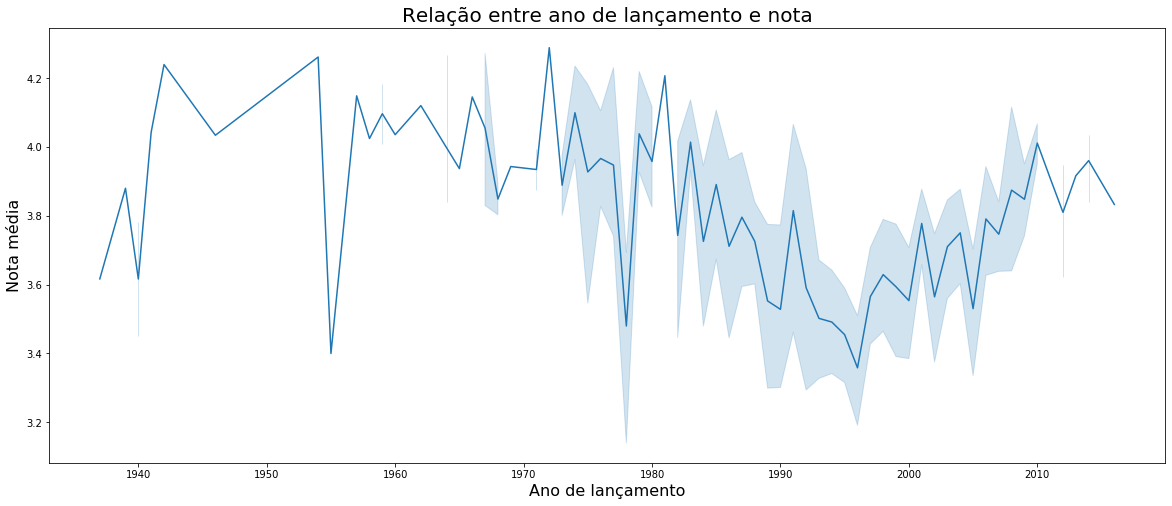

In [51]:
# solucao
plt.figure(figsize=(20,8))
ax = sns.lineplot(x=filmes.ano_de_lancamento, y=filmes.nota_media)
ax.set_title('Relação entre ano de lançamento e nota', fontsize = 20)
ax.set_ylabel('Nota média', fontsize = 16)
ax.set_xlabel('Ano de lançamento', fontsize = 16)
ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [52]:
# solução (código)
pd.DataFrame.corr(filmes)['nota_media'][0]

-0.1591455520444448

### Solução (explicação)
- A correlação é negativa e pode gerar um erro de interpretação. O "erro" trata-se do fato do ano de lançamento não ter relação com o período que o filme foi avaliado.

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

In [53]:
# solução
infos = filmes[['ano_de_lancamento','nota_media','total_de_votos']]

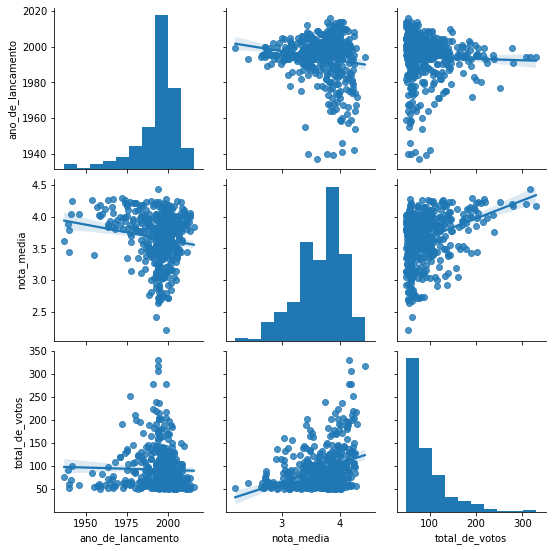

In [54]:
ax = sns.pairplot(infos, kind = 'reg')
ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

Text(0.5, 0.98, 'Análise de distribuição com Ano de Lançamento, nota média e total de votos, destacando o genero Animation')

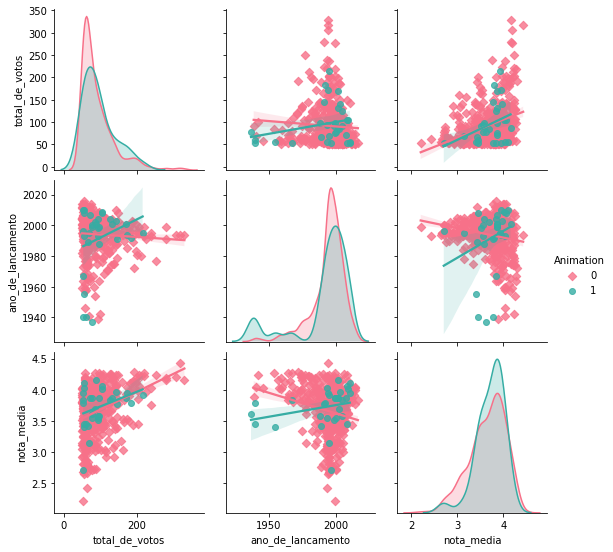

In [55]:
sns.pairplot(filmes, hue='Animation', palette='husl', kind = 'reg', 
             markers = ['D','o'],
             x_vars = ['total_de_votos', 'ano_de_lancamento','nota_media'], 
             y_vars = ['total_de_votos', 'ano_de_lancamento','nota_media'])
ax.fig.suptitle('Análise de distribuição com Ano de Lançamento, nota média e total de votos, destacando o genero Animation')

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:

- Analisando o pairplot, parece haver uma maior distribuição de nota média com valores mais altos à medida que o ano de lançamento também aumenta, ou seja, tem uma correlação positiva, mesmo que baixa. Não parece ser linear, uma vez que temos elementos espalhados em todo o gráfico e não seguem uma tendencia.
- Da mesma forma que a nota média, o total de votos segue com uma correlação positiva, e uma linearidade um pouco maior, mesmo que ainda tenha elementos espalhados por todo o gráfico
- Comparando com todas as outras categorias ao mesmo tempo, elas seguem um comportamento de correlação negativo, a linha de tendência aponta para baixo em ambos os casos (nota média e total de votos).
- Uma hipótese para que tenha esse comportamento é que o genero Animation, mesmo estando entre os 10 generos de menor quantidade, tendem a ser muito populares e bem votados.

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

## Primeira Visualização Extra:
### Como foi a evolução da quantidade de filmes do gênero Animation ao longo dos anos:

In [56]:
animacao_com_ano = filmes.ano_de_lancamento.multiply(axis='index',other=filmes.Animation)
animacao_com_ano = animacao_com_ano[animacao_com_ano>0].sort_values().reset_index(drop=True)
animacao_com_ano_int = []
for i in range(len(animacao_com_ano)):
    animacao_com_ano_int.append(int(animacao_com_ano[i]))

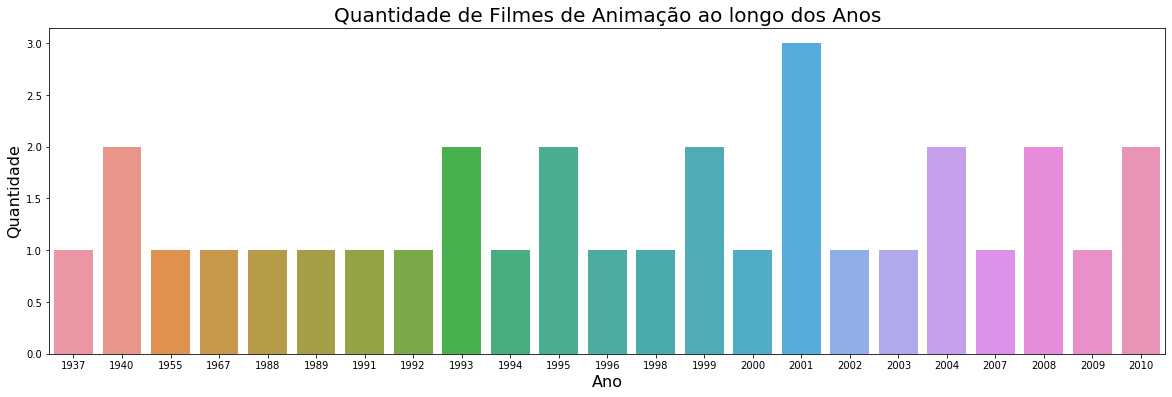

In [57]:
ax = sns.countplot(x=animacao_com_ano_int)
ax.figure.set_size_inches(20, 6)
ax.set_title('Quantidade de Filmes de Animação ao longo dos Anos', fontsize=20)
ax.set_xlabel('Ano', fontsize=16)
ax.set_ylabel('Quantidade', fontsize=16)
ax

### Conclusão:
- Foi interessante a visualização. Selecionei essa pergunta por imaginar justamente que a quantidade de filmes de animação seria muito maior com o passar dos anos, porém continuou entre 0 e 3 por ano.
- Na visualização acima, mostra apenas os anos com um ou mais filmes de animação

## Segunda Visualização Extra:
### Como se comportam os usuarios ao dar nota:

In [58]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [59]:
votos_por_usuario = notas.groupby('usuarioId').count()
votos_por_usuario.drop(columns=['nota','momento'],axis=1, inplace=True)
votos_por_usuario.rename(columns={'filmeId':'votos_por_usuario'}, inplace=True)
votos_por_usuario = votos_por_usuario['votos_por_usuario']
votos_por_usuario

usuarioId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: votos_por_usuario, Length: 610, dtype: int64

Text(0, 0.5, 'Total de votos')

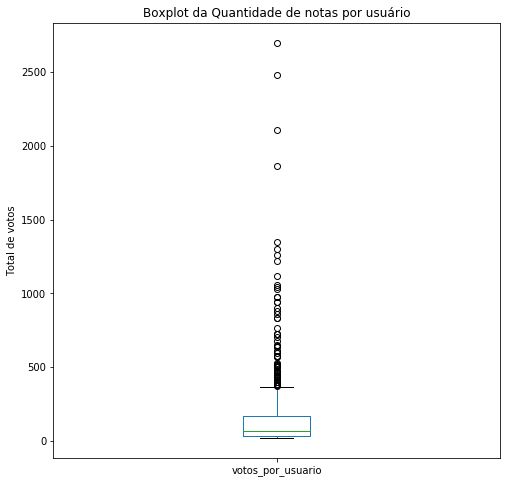

In [60]:
plt.figure(figsize=(8,8))
votos_por_usuario.plot(kind='box')
plt.title("Boxplot da Quantidade de notas por usuário")
plt.ylabel('Total de votos')

In [61]:
votos_por_usuario.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: votos_por_usuario, dtype: float64

### Conclusão:
- A visualização acima mostra um boxplot da quantidade de votos por usuário.
- Abaixo, a descrição mais completa de como se comportam esses números. Pelo fato de alguns usuários terem uma enorme quantidade de votos, a média se eleva para 165 votos por usuário, porém 50% dos usuários tem até 70 votos